# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [43]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [44]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [45]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [33, 207, 362]
       
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  29729  4786     7326    6130               361          1083
1   2541  4737     6089    2946              5316           120
2   2121  1601     2453     560               179           712

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Index 33:  This seems like a large food market that sells a fair amount of fresh food, milk, grocery, and frozen items, along with a deli/restaurant area.  The low quantityu of detergents_paper goods might indicate that the customer get these from another distributor.

Index 207: This seems like a corner convenient store that sells mostly grocery with some milk and food items, as well as detergent and paper goods.

Index 362: This seems like a fresh-cooking family restaurant since its most pricy categories are food related, with decent amount of grocery for supplies.  If it bought more frozen items it would more likely be a fast food restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [46]:
# Note:  I decided to score the relevance of all features, not just one.
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
random_n=999
regressor = DecisionTreeRegressor(random_state=random_n)
data_copy = data.copy()

def show_samples(df, label, target):
    indices = [0, 1, 2]
    samples = pd.DataFrame(df.iloc[indices], columns = df.keys()).reset_index(drop = True)
    print "Samples of", label, "dataset for target column", target, ":"
    display(samples)    
    
def fit_specific_columns(fit_data, column):
    new_data = fit_data.drop(column, axis = 1)

    target = fit_data[[column]]

    # show_samples(target, "Target", column)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=random_n)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)    

    return score
        
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
columns = [ 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen' ]
for column in columns:
    score = fit_specific_columns(data_copy, column)
    print "Score for", column, ":", score  

Score for Fresh : -0.12012859053
Score for Milk : 0.28964458106
Score for Grocery : 0.744203723879
Score for Frozen : -0.0444732344733
Score for Detergents_Paper : 0.50705411752
Score for Delicatessen : -9.22617914723


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I fitted all the features.  Grocery has the highest R^2 score at 0.744.  Detergent_Paper is next at 0.507, and Milk has the lowest positive R^2 score at 0.290. All other scores were negative.  Grocery thus seems most promising in being useful for predicting customer purchasing of other categories, and also Detergent_Paper and Milk to lesser extents.  Those categories with negative scores are not helpful.  Given that the R^2 score returned by the DecisionTreeEstimator can be negative, I believe that this score is what is normally called the adjusted R^2 score.  I believe that this dataset can be considered stationary (i.e. customers spending habits are based on the nature of their businesses and won't vary much over time).  Thus, the three categories with positive R^2 scores could be useful in predicting spending habits, with effectiveness relative to the size of their R^2 scores.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

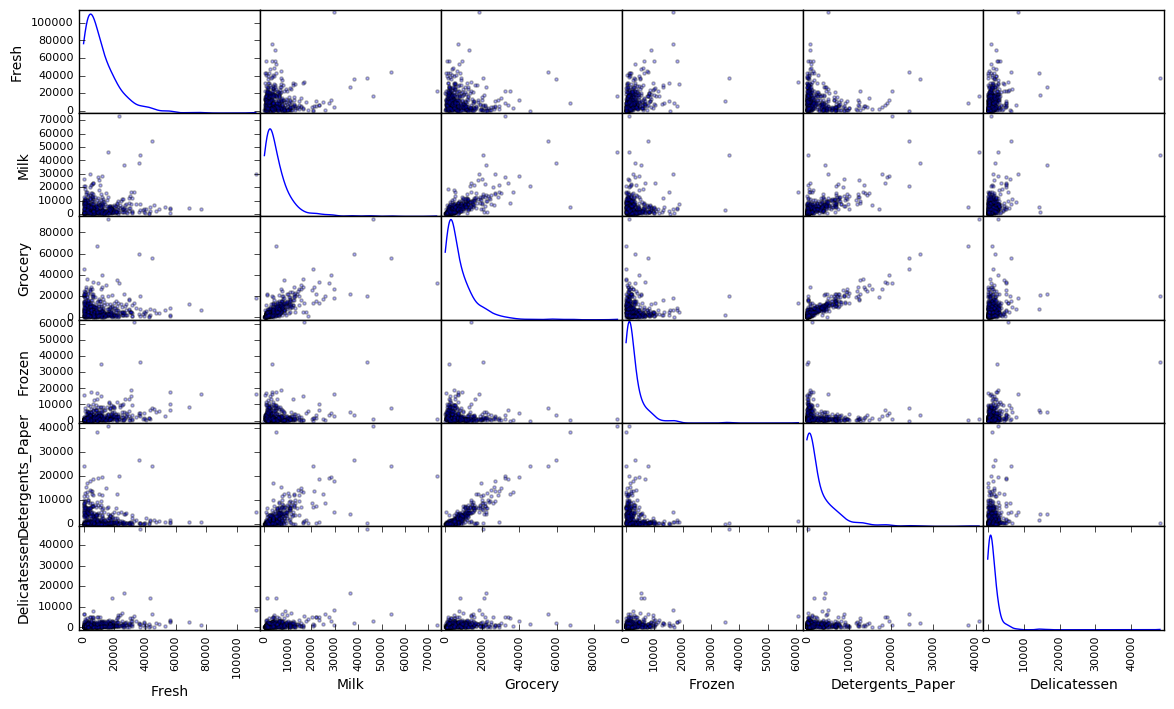

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012ADFCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F163C8>]], dtype=object)

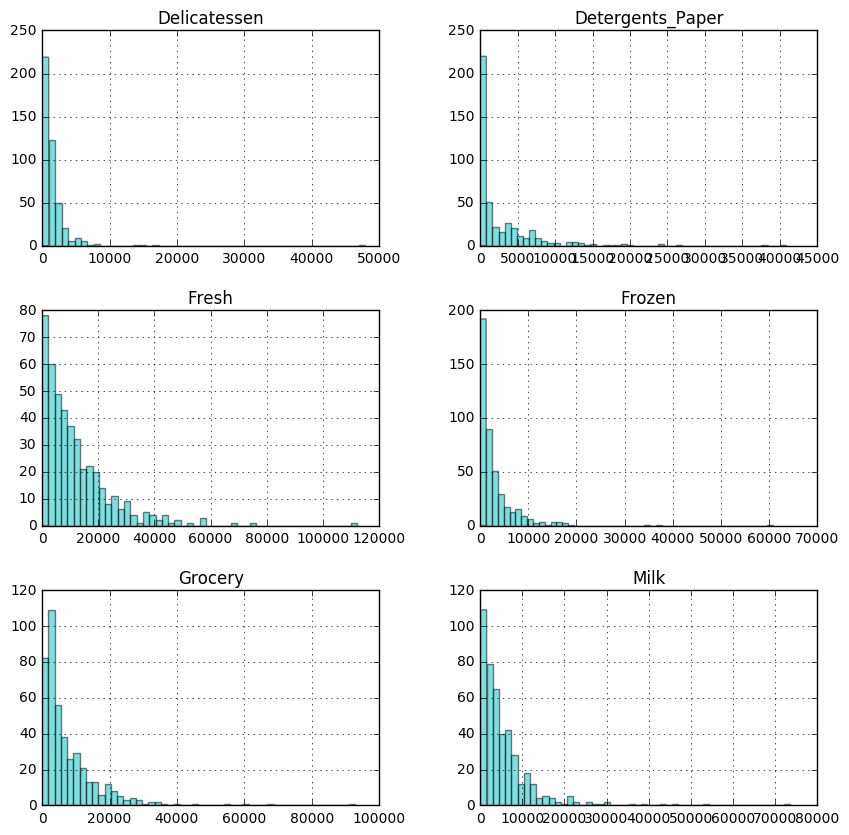

In [7]:
data.hist( grid=True, color='c', alpha=0.5, bins=50, figsize=(10,10), layout=(3,2))

In [8]:
for column in columns:
    print "Mean:",data[[column]].mean()
    print "Std. Deviation:", data[[column]].std()

Mean: Fresh    12000.297727
dtype: float64
Std. Deviation: Fresh    12647.328865
dtype: float64
Mean: Milk    5796.265909
dtype: float64
Std. Deviation: Milk    7380.377175
dtype: float64
Mean: Grocery    7951.277273
dtype: float64
Std. Deviation: Grocery    9503.162829
dtype: float64
Mean: Frozen    3071.931818
dtype: float64
Std. Deviation: Frozen    4854.673333
dtype: float64
Mean: Detergents_Paper    2881.493182
dtype: float64
Std. Deviation: Detergents_Paper    4767.854448
dtype: float64
Mean: Delicatessen    1524.870455
dtype: float64
Std. Deviation: Delicatessen    2820.105937
dtype: float64


**Answer:**

The pairs of features which exhibit some degree of correlation are among Grocery, Detergent_Paper, and Milk.  These confirm the potential usefulness of the the categories with positive R^2 scores in predicting spending habits.  What I learn from the above plots is that the positive R^2 categories seems to be only useful for predicting among themselves, and are not useful for predicting spending habits of any of the categories with negative R^2.

Per the above histograms, the purchasing data are not normally distributed. Most of the data points are on the low end.  The code below shows the proportion of the data that are less than 5000 for all categories.  The 'Fresh' category, with by far the highest mean of 12000, is the only category where a minority of data points are below 5000 (proportion < 5000 = 0.34).

In [9]:
threshold=5000
for column in columns:
    negatives = data.loc[data[column] < threshold]
    print "Proportion of data less than", threshold, "in column", column, ":", float(len(negatives.index)) / float(len(data.index))

Proportion of data less than 5000 in column Fresh : 0.338636363636
Proportion of data less than 5000 in column Milk : 0.613636363636
Proportion of data less than 5000 in column Grocery : 0.513636363636
Proportion of data less than 5000 in column Frozen : 0.822727272727
Proportion of data less than 5000 in column Detergents_Paper : 0.813636363636
Proportion of data less than 5000 in column Delicatessen : 0.956818181818


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

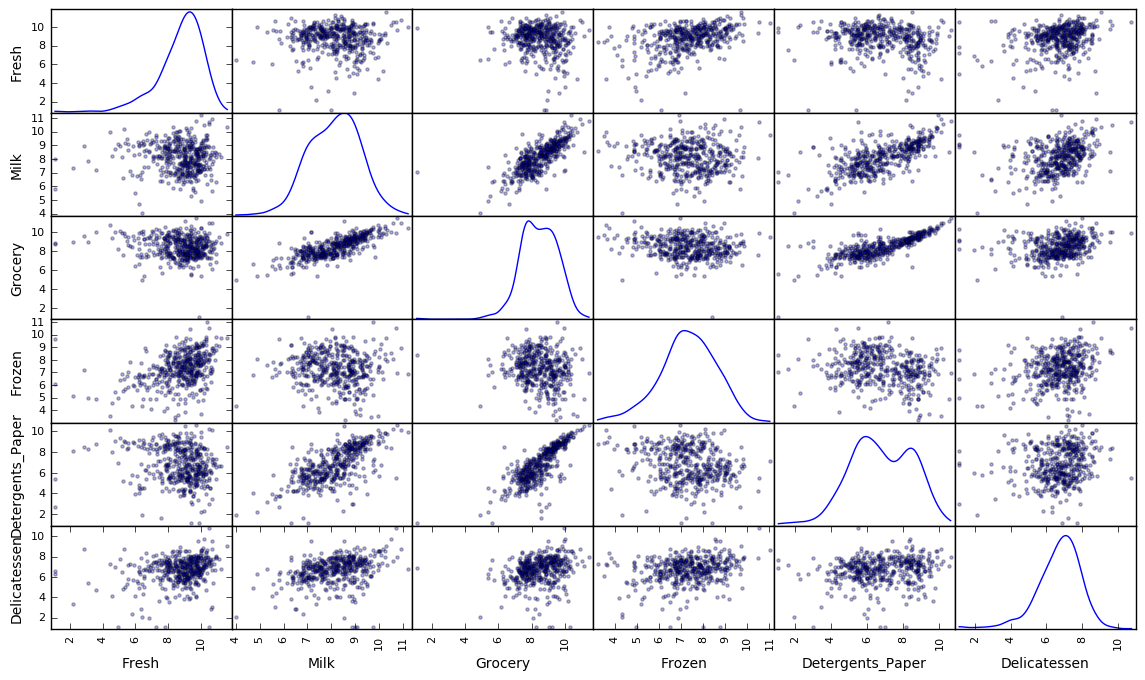

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.299878  8.473450  8.899185  8.720950          5.888878      6.987490
1   7.840313  8.463159  8.714239  7.988204          8.578476      4.787492
2   7.659643  7.378384  7.805067  6.327937          5.187386      6.568078

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
66   2.197225  7.335634  8.911530  5.164786          8.151333      3.295837
95   1.098612  7.979339  8.740657  6.086775          5.407172      6.563856
96   3.135494  7.869402  9.001839  4.976734          8.262043      5.379897
218  2.890372  8.923191  9.629380  7.158514          8.475746      8.759669
338  1.098612  5.808142  8.856661  9.655090          2.708050      6.309918

Outliers:  [66, 95, 96, 218, 338]
Data points considered outliers for the feature 'Milk':


Empty DataFrame
Columns: [Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []

Outliers:  [66, 95, 96, 218, 338]
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75  9.923192  7.036148  1.098612  8.390949          1.098612      6.882437

Outliers:  [66, 95, 96, 218, 338, 75]
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
38   8.431853  9.663261   9.723703  3.496508          8.847360      6.070738
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
420  8.402007  8.569026   9.490015  3.218876          8.827321      7.239215

Outliers:  [66, 95, 96, 218, 338, 75, 38, 65, 420]
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75    9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
142  10.519646  8.875147  9.018332  8.004700          2.995732      1.098612
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
177   9.453992  8.899731  8.419139  7.468513          2.995732      7.875119
204   7.578657  6.792344  8.561401  7.232010          1.609438      7.191429
237   9.835851  8.252707  6.385194  8.441176          3.332205      7.102499
289  10.663966  5.655992  6.154858  7.235619          3.465736      3.091042
338   1.098612  5.808142  8.856661  9.655090          2.708050      6.309918
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275
402  10.186371  8.466531  8.535230  5.393628          2.302585      5.828946

Outliers:  [66, 95, 96, 218, 338, 75, 38, 65, 420, 75, 122, 142, 154, 161, 177, 204, 237, 289, 338, 356, 402]
Data points considered outliers for the feature 'Delicatessen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
66    2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
109   7.248504  9.724899  10.274568  6.511745          6.728629      1.098612
128   4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
137   8.034955  8.997147   9.021840  6.493754          6.580639      3.583519
142  10.519646  8.875147   9.018332  8.004700          2.995732      1.098612
154   6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
184   5.789960  6.822197   8.457443  4.304065          5.811141      2.397895
187   7.798933  8.987447   9.192075  8.743372          8.148735      1.098612
203   6.368187  6.529419   7.703459  6.150603          6.860664      2.890372
233   6.871091  8.513988   8.106515  6.842683          6.013715      1.945910
285  10.602965  6.461468   8.188689  6.948897          6.077642      2.890372
289  10.663966  5.655992   6.154858  7.235619          3.465736      3.091042

Outliers:  [66, 95, 96, 218, 338, 75, 38, 65, 420, 75, 122, 142, 154, 161, 177, 204, 237, 289, 338, 356, 402, 66, 109, 128, 137, 142, 154, 184, 187, 203, 233, 285, 289]
Dropped 27 outliers from data
Remaining data point count 413


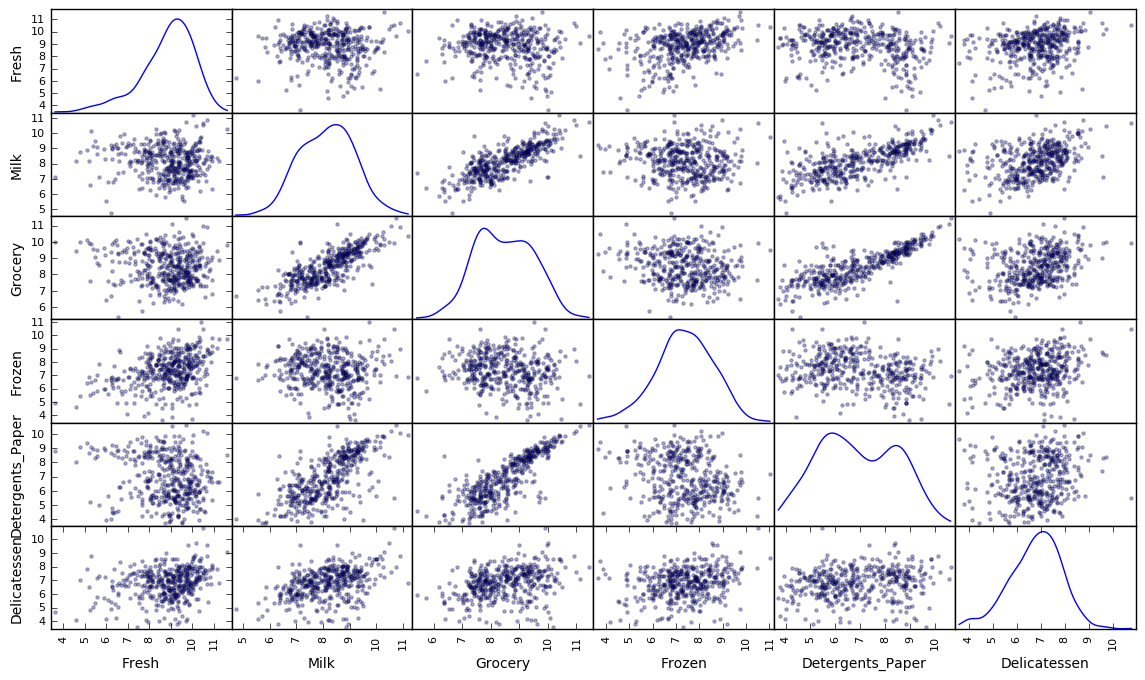

In [12]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    IQR = Q3 - Q1
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * IQR
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlying_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlying_data)
    outliers.extend(outlying_data.index.values)    
    print "Outliers: ", outliers
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Dropped", len(set(outliers)), "outliers from data"
print "Remaining data point count", len(good_data.index)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

index 75: Has outliers for both Grocery and Detergents_Paper.

index 338: Has outliers for both Fresh and Detergents_Paper.

index 66: Has outliers for both Fresh and Delicatessen.

index 142, 154, and 289: Has outliers for both Detergents_Paper and Delicatessen.

Removing data points with outlier values makes the distributions closer to a normal distribution by bringing the peak of the distribution closer to the center of the data value range.  Compare the log_data plot above the "Observations" section with the good_data plot just above "Question 4".  The outliers are more concentrated on the low side, thus pushing the peak of the distribution way to the right of the data range, as seen in the log_data plot.  In the good_data plot with the outliers remove, the peaks are moved substantially toward the center of the data value range.  

The above data points with outliers in multiple features should be removed along with the other data points with outliers in only one feature.  Removing these data points helps to center the distributions on multiple features.

Observation Note:  The 'Milk', 'Grocery', and 'Detergents_Paper' features that were correlated before still shows correlation after the logarithm of the data is taken.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

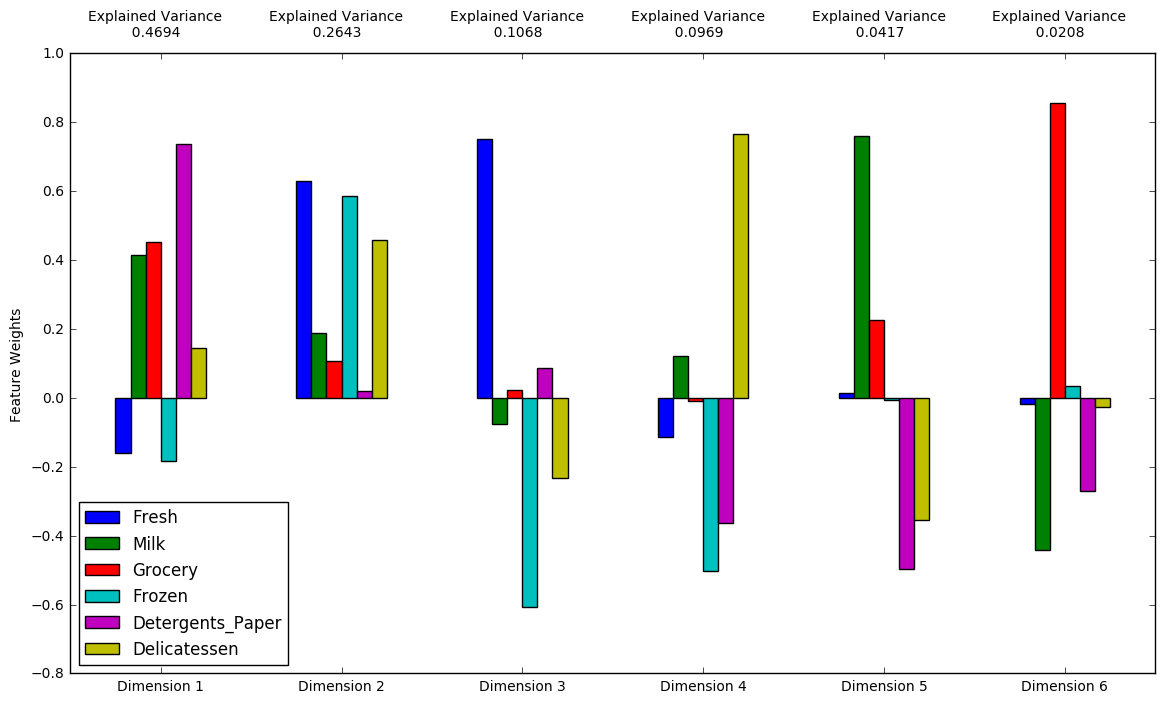

In [13]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and second principal components explain 0.73 of the variance.  The first four principal components explain 0.937 of the variance. These four components represents over 93% of the explained variance in customer buying habits. What PCA does is find orthogonal dimensions with maximum variances from the data and create axes of dimensionality along those directions.  Each PCA dimension's new axis is aligned along a direction of original features that are correlated to each other, meaning that the positively-weighted features of each dimension have positive correlations.  The higher the explained variance of a dimension, the more strongly correlated the categories that are purchased by some subset of customers.  We see these correlations in the pair-wise scatter plots earlier in this notebook.  These earlier plots shows correlations in 2 dimensions. PCA operates in all 6 dimensions of our feature space and create new dimensions along orthogonal axes along directions of highest variance (i.e. best correlation among various features) in the whole 6-dimension feature hyperspace that are essentially new independent features of our data, ranked by the proportion of explained variance for each.

Question: **Hint** say that "A positive increase in a specific dimension corresponds..."  What does "increase in a specific dimension" mean?  For example, does it mean to say "increase in *the explained variance of* a specific dimension?"

One way to segment customers is by the categories of goods that they buy, assuming that there are similarities among different customers. Thus, the first four dimensions could represent customer segments with identiable purchasing habits as characterized by 93% of the explained variance.  The purchasing behaviors of the remaining customers are too random (i.e. correlations among purchasing habits are too weak) to be categorized.

Take the first dimension which is a along a new axis where purchases of Milk, Grocery, Detergents_Paper, and to a lesser extent Delicatessen, are well-correlated. This dimension could well represent a customer segment that are interested in some proportional quantities of these goods, like maybe a convenient store.  The second dimension (second best in explained variane) have positive correlations from all six features, like a larger market.  The third dimension has correlations among Fresh, Grocery, and Detergent_Paper. Maybe this dimension represents cook-to-order restaurants.  The fourth dimension is all about Milk and Delicatessen.  This could represent sandwhich shops.

Regarding the Observation exercise below, my original interpretations were:

Index 33: This seems like a large food market that sells a fair amount of fresh food, milk, grocery, and frozen items, along with a deli/restaurant area. The low quantityu of detergents_paper goods might indicate that the customer get these from another distributor.

Index 207: This seems like a corner convenient store that sells mostly grocery with some milk and food items, as well as detergent and paper goods.

Index 362: This seems like a fresh-cooking family restaurant since its most pricy categories are food related, with decent amount of grocery for supplies. If it bought more frozen items it would more likely be a fast food restaurant.

In the data below, index 33 best fit along the second dimension which is consistent with my original observation that it is some kind of a market.  Index 207 best fit along the second dimension, or some kind of a convenient store, consistent with my original assessment.  Index 362 best fit along the fourth dimension.  I original thought it is some kind of restaurant.  The fourth dimension is slightly different in that it seems more deli/sandwich-oriented.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -0.8695       1.8996       0.1256      -0.3010       0.7753   
1       1.2359      -1.0563      -0.5362      -2.3126       0.1406   
2      -1.5329      -1.6997      -0.3090       1.0142       0.1709   

   Dimension 6  
0       0.5058  
1      -0.2928  
2       0.2190

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -0.8695       1.8996
1       1.2359      -1.0563
2      -1.5329      -1.6997

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

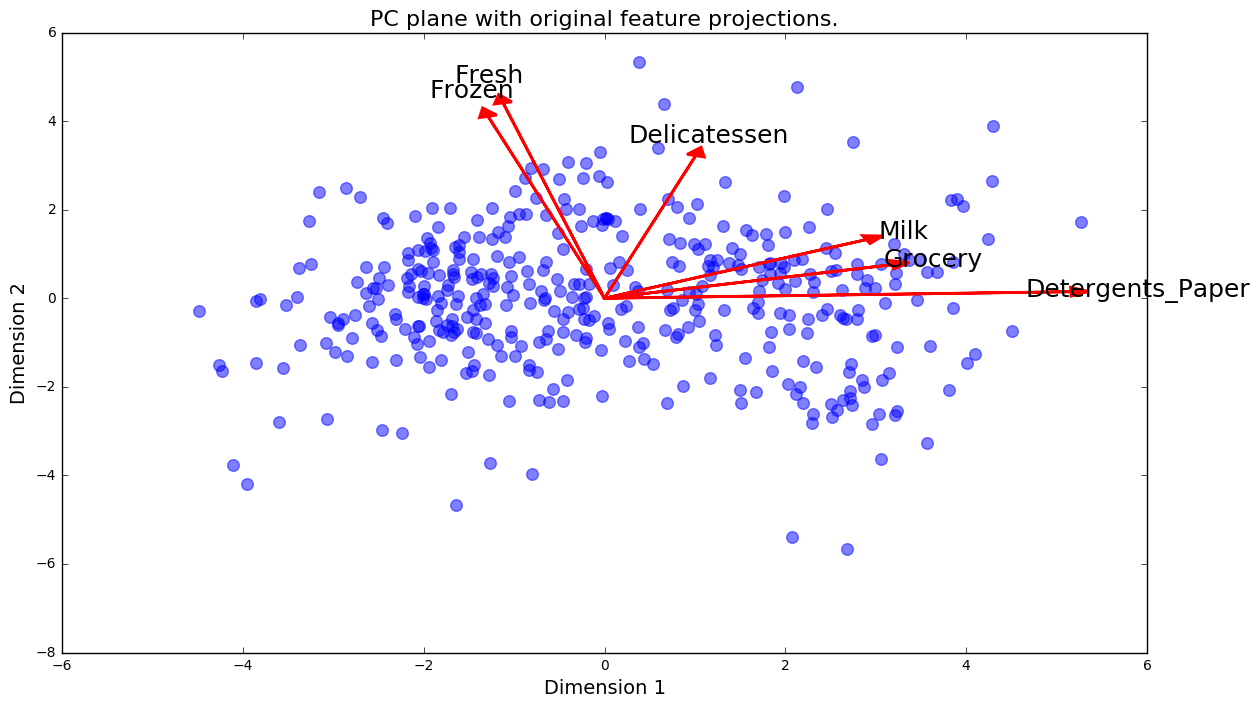

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

First a couple of notes on the above observation.  Detergents_Paper is most strongly correlated with the first component, while Fresh, Frozen, and Delicatessen are best correlated with the second component.  This does confirm the observations thus far that customers tend to be a store or market of some kind (first component) or a restaurant of some kind (second component).

The big difference between K-Means and Gaussain Mixture Model is that K-Means results in discrete clusters where all data points must be selected into one of the clusters.  Gaussian Mixture Model operates on probabilities of data points belonging to different clusters, so along cluster borders some datapoints might have non-trivial probabilities of belonging to multiple clusters. Both are prone to local minima depending on the initial cluster center selections.  The chance of local minima increases with the number of features.  We have 6, which doesn't seem like much, but it's probably still advisable to run the clustering multiple times to make sure that a global clustering solution is found.

While there are likely some customers that will have some aspects of a market and some aspects of a restaurant, ultimately we need to make a discrete segmentation to inform delivery options.  For these in-between customers, which likely will only be a few, just picking a delivery option for consistency will be way better than flip-flopping among different options based on probabilities.  Therefore I will choose the discrete K-Means approach.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n in xrange(2,7):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n, n_init=10, random_state=random_n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "Cluster count", n, "has silhouette score", score


Cluster count 2 has silhouette score 0.439957357065
Cluster count 3 has silhouette score 0.365899936279
Cluster count 4 has silhouette score 0.336249084287
Cluster count 5 has silhouette score 0.362233718212
Cluster count 6 has silhouette score 0.36412770912


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

2 clusters has the best silhouette score of 0.44.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

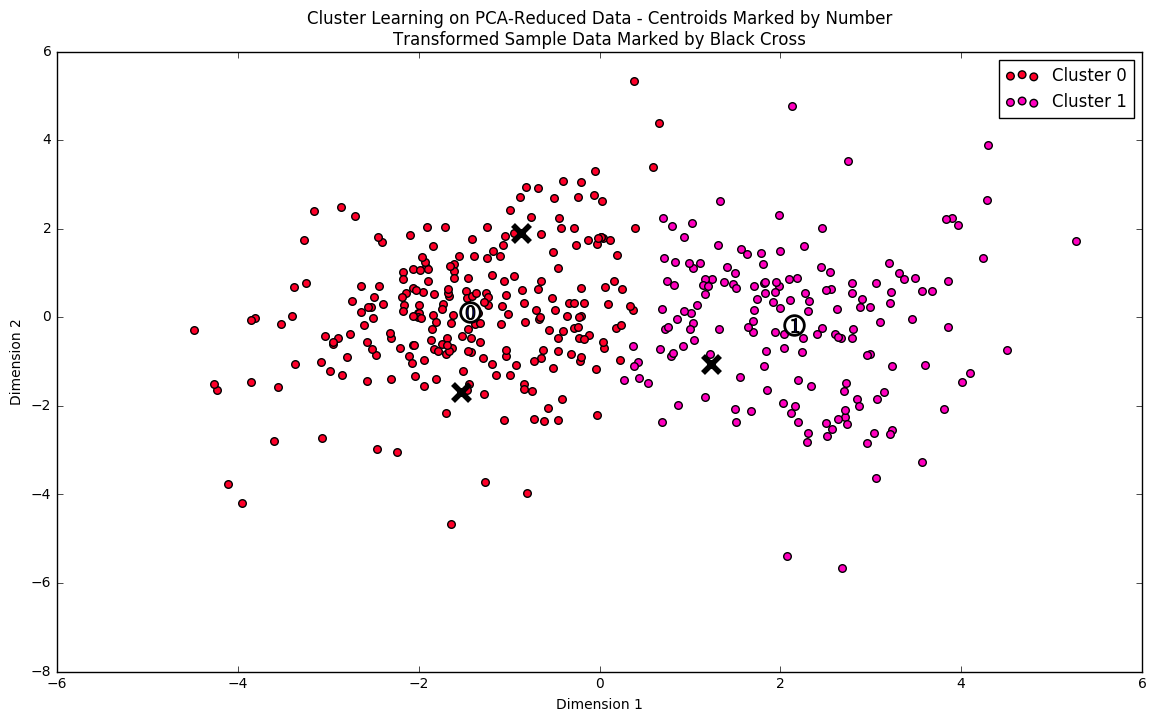

In [27]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, n_init=10, random_state=random_n).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [47]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

for row in true_centers.iterrows():
    index, row_data = row
    total = sum(row_data)
    print "Total purchase cost for segment", index, "is", total

# Display a description of the dataset
display(data.describe())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9327.0  1972.0   2541.0  2195.0             344.0         763.0
Segment 1  4334.0  8157.0  12449.0   949.0            4760.0        1109.0

Total purchase cost for segment Segment 0 is 17142.0
Total purchase cost for segment Segment 1 is 31758.0


Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 Total Purchase Cost: 17142
Segment 1 Total Purchase Cost: 31758

Segment 0 with cluster centers of Fresh and Frozen in the third quartile are likely to be eateries.
Segment 1 with cluster centers of Milk, Grocery, and Detergents_Papers all in the fourth quartile are likely to be markets that sell more general goods.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [48]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Sample point 0 and 2 are predicted to be cluster 0, which are restaurants.
Sample point 1 is predicted to be cluster 1, which are stores or markets.

The one inconsistency here with earlier predictions is sample point 0, which I had predicted as some kind of large markets. It's more likely to be a large restaurant. Its relative purchases of Milk, Grocery, and particularly Detergents_Paper (3rd, 2nd, and 2nd quartiles respectively) are small relative to its purchases of Fresh and Frozen (both well into the 4th quartile), consistent with Segment 0.  I was probably fooled by the large size of its Fresh purchases to think that it was a market.  Instead, it looks more like a really large restaurant.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We can't assume that the change in delivery schedule will affect all customers equally.  One way to determine which customer group the change affect most is to make the change for two small samples of customers, one from each cluster, and measure the relative level of complaints and/or affirmations from these two samples.  If the samples from one or both clusters affirm the new delivery schedule, then the wholesaler can proceed with the delivery change for that cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The cluster that the original customers belong to is the new target label.  Training a supervised classifier on the orginal customer data with their cluster id as the target and then fitting the classifier to the new customers should classify them into the appropriate customer segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

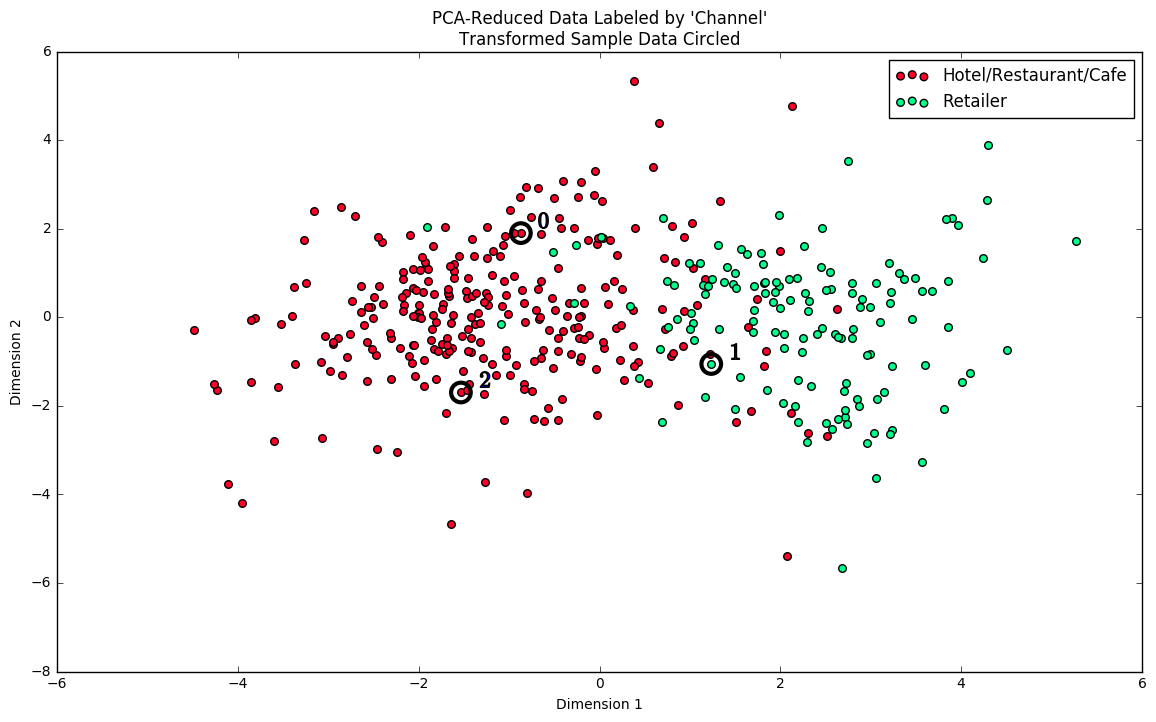

In [49]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I would say that the results from my choices of clustering algorithm and the number of clusters in this project compares very well with the above underlying distribution of Hotel/Restaurant/Cafe versus Retailers.  The sample points certainly correspond with the right channels.  This channel distribution does correspond to two customers segments that are well separated, though there are some overlaps.  I would consider these classifications consistent with my previous definitions of customers segments, with are restaurants (correspond to Hotel/Restaurant/Cafe) and markets and stores (correspond to retailers).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.